In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi

from matplotlib import animation, rc
from IPython.display import HTML

In [52]:
def random_data(xs):
    noise = np.random.rand(len(xs)) * 0.2 - 0.1
    values = np.sin(xs * 2 * pi)
    return values + noise 

def cost(theta, xs, ys):
    guessed = hyp(theta, xs)
    error = np.sum((guessed - ys) ** 2) * 0.5
    return error

def hyp(thetas, xs, polynomial=True):
    summed = np.zeros(xs.shape)
    for i, t in enumerate(thetas):
        summed += t * (xs ** i) if polynomial else t * xs
    return summed

def hyp_simple(theta, x, polynomial=True):
    summed = 0
    for i, t in enumerate(theta):
        summed += t * (x ** i) if polynomial else t * x
    return summed
    

In [56]:
#tmp = np.linspace(0, 1, 100)
#ones = np.ones((1, 100), dtype='float')
#xs = np.concatenate((ones, np.reshape(tmp, (1, 100))))
#m = xs.shape[1]

alpha = 0.005
length = 100
xs = np.linspace(0, 1, length)
ys = random_data(xs)

In [57]:
cost(theta, xs, ys)

407.94410184337903

[-5.39334845 -1.22682927  3.58766154  8.36104525]


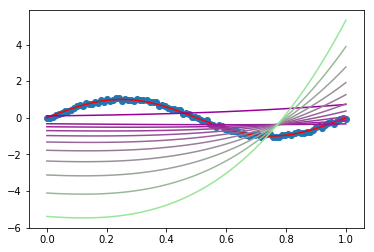

In [68]:
plt.ion()
plt.scatter(xs, ys)
plt.plot(xs, np.sin(xs * 2 * pi), color="red")

theta = np.random.rand(4)
for iteration in range(10000):
    for i, x in enumerate(xs):
        for j in range(len(theta)):
            theta[j] = theta[j] + (alpha * (ys[i] - hyp_simple(theta, x)) * x)
    if iteration % 1000 == 0:
        plt.plot(xs, hyp(theta, xs), color=(0.6, 0.8 * iteration / 10000, 0.6))

plt.plot(xs, hyp(theta, xs), color=(0.6, 0.9, 0.6))
print(theta)